In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/Users/nityaravi/Documents/GitHub/RotationCurves/ellipticals/')

from IO_data import*

In [5]:
MAP_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/'

## Pick a new color map

In [12]:
gal_ID = '8614-12703'

maps = extract_data(MAP_FOLDER, gal_ID, 'star_sigma')
sigma_masked = ma.array(maps['star_sigma'], mask=maps['star_sigma_mask'])

Text(0, 0.5, 'spaxel')

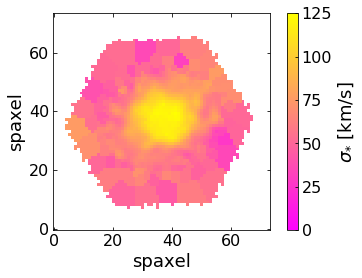

In [31]:
fig, ax = plt.subplots()

sigma_map = sigma_masked
############################################################################
# Determine limits of color scale
#---------------------------------------------------------------------------
minimum = ma.min(sigma_map)
maximum = ma.max(sigma_map)

if minimum > 0:
    vmax_bound = maximum
    vmin_bound = 0
else:
    vmax_bound = np.max( [np.abs(minimum), np.abs(maximum)])
    vmin_bound = -vmax_bound

    cbar_ticks = np.linspace( vmin_bound, vmax_bound, 11, dtype='int')

vel_im = ax.imshow( sigma_map, 
                        cmap='spring', 
                        origin='lower', 
                        vmin=vmin_bound, 
                        vmax=vmax_bound)

cbar = plt.colorbar( vel_im, ax=ax, ticks=cbar_ticks)
cbar.ax.tick_params( direction='in', labelsize=16)
cbar.set_label(r'$\sigma_{*}$ [km/s]', fontsize=18) # formatting for paper

ax.tick_params( axis='both', direction='in', labelsize=16)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xlabel('spaxel', fontsize=18)
ax.set_ylabel('spaxel', fontsize=18)